# Example 12.1: Clapeyron Equation

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
Determine the enthalpy of vaporization for water at 100 kPa using:
* (a) the Clapeyron equation
* (b) the Clapeyron-Clausius equation
* (c) the steam tables

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074201&node=10465100&a=2106948292&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [6]:
from kilojoule.templates.default import *
# Define variable representation
set_latex(dict(
    dPdT_forward = r'\left.\frac{\partial P}{\partial T}\right|_{forward}',
    dPdT_central = r'\left.\frac{\partial P}{\partial T}\right|_{central}',
    dPdT_backward = r'\left.\frac{\partial P}{\partial T}\right|_{backward}'
    ))

   
fluid = realfluid.Properties('Water')

p[1] = Quantity(100,'kPa')
x[1] = 0
states.fix(1,fluid)

p[2] = Quantity(125,'kPa')
x[2] = 0
states.fix(2,fluid)

p[3] = Quantity(75,'kPa')
x[3] = 0
states.fix(3,fluid)

p[4] = p[1]
x[4] = 1
states.fix(4,fluid)

states.display();

,$T$ [K],$p$ [kPa],$v$ [m³/kg],$u$ [kJ/kg],$h$ [kJ/kg],$s$ [kJ/K/kg],$x$ [],$phase$ [],$c_{v}$ [kJ/K/kg],$c_{p}$ [kJ/K/kg]
1,372.755929,100,0.001043,417.399595,417.503911,1.302758,0,twophase,3.770208,4.215223
2,379.115497,125,0.001048,444.222511,444.353540,1.374111,0,twophase,3.737321,4.222934
3,364.907999,75,0.001037,384.359647,384.437439,1.213174,0,twophase,3.811182,4.206951
4,372.755929,100,1.693928,2505.554911,2674.947677,7.358849,1,twophase,1.554798,2.078449


### (a) Clapeyron equation
The Clapeyron equation relates the enthalpy of vaporization to easily measureable properties, $T$, $p$, and $v$
$$ \left( \frac{\partial p}{\partial T} \right)_{sat} = \frac{h_{fg}}{T_{sat}v_{fg}}$$
This can be solved for the enthalpy
$$ h_{fg} = Tv_{fg}\left(\frac{\partial P}{\partial T}\right)_{sat} $$
The application of this equation depends on knowing the partial derivative of the pressure with respect to the temperature during phase change.  This can be visualized as the slope of the saturation curve on a $p$-$T$ diagram at the pressure of interest

In [7]:
%%showcalc
v_fg = v[4]-v[1]

\begin{align}
  v_{fg} &=   {v}_{ 4 } - {v}_{ 1 }  \\
    &=  1.6939\ \frac{\mathrm{m}^{3}}{\mathrm{kg}} - 0.0010432\ \frac{\mathrm{m}^{3}}{\mathrm{kg}} \\
    &= 1.6929\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}



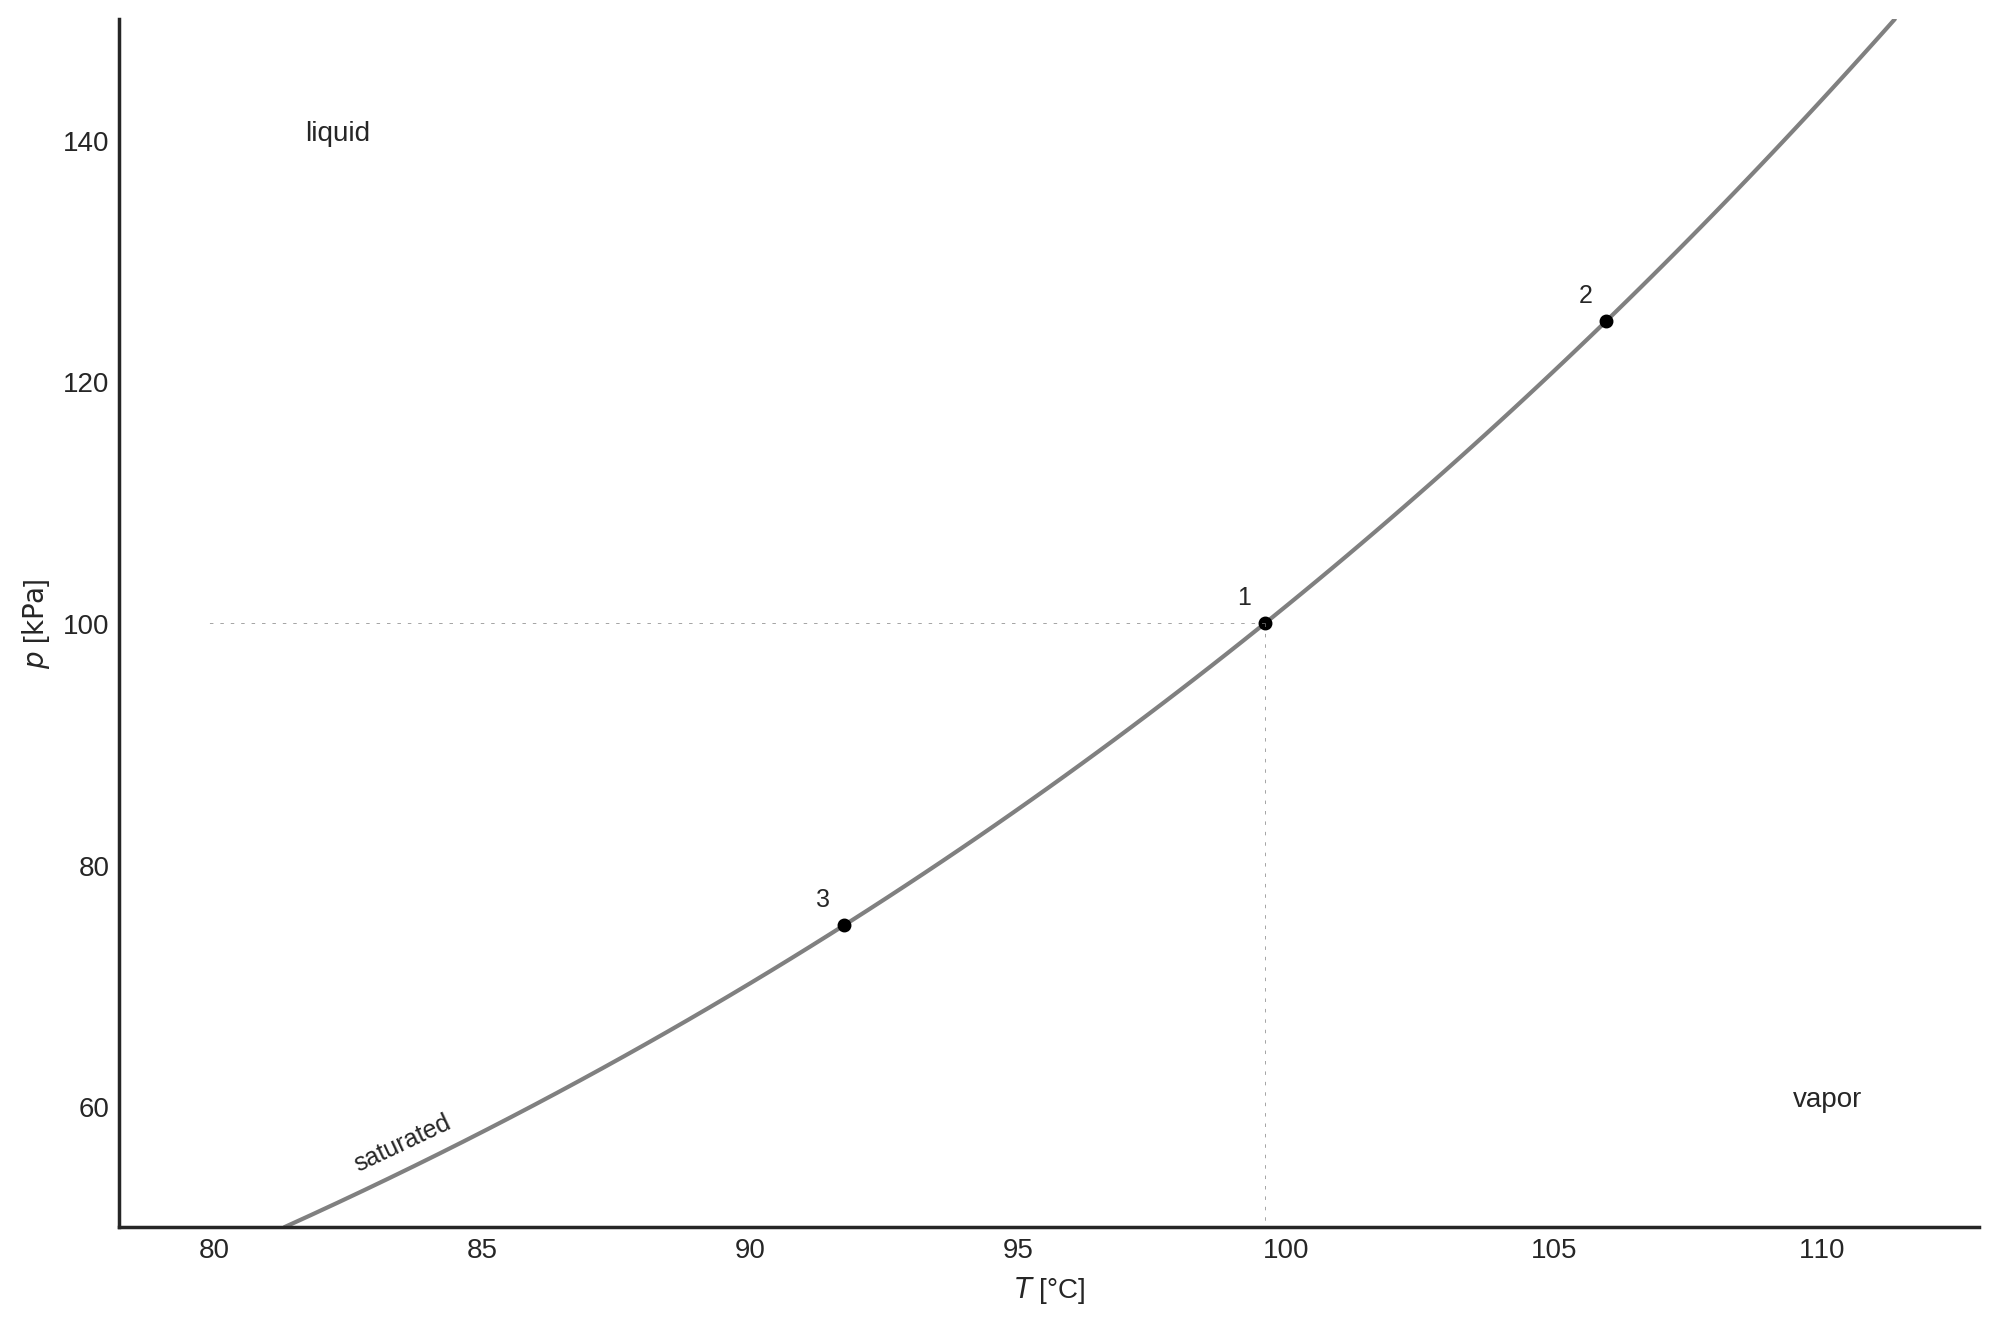

In [8]:
pT = fluid.property_diagram(x="T",y="p",saturation=False)
pT.ax.set_ylim(bottom=50,top=150)
# pT.ax.set_xlim(left=80,right=120)

# Label phases
pT.plot_iso_line("x",0,y_range=Quantity([50,150],'kPa'),label='saturated',ycoor=55,color='gray')
pT.text(0.1,.9,'liquid',axcoor=True)
pT.text(0.9,.1,'vapor',axcoor=True)

# Plot states
pT.plot_state(states[1],label_loc='north west',gridlines=True)
pT.plot_state(states[2],label_loc='north west')
pT.plot_state(states[3],label_loc='north west')


#### Forward Difference

In [9]:
%%showcalc
dPdT_forward = (p[2]-p[1])/(T[2]-T[1])
h_fg_forward = (T[1].to('K')*v_fg*dPdT_forward).to('kJ/kg')

\begin{align}
  \left.\frac{\partial P}{\partial T}\right|_{forward} &=  \frac{  {p}_{ 2 } - {p}_{ 1 }  }{  {T}_{ 2 } - {T}_{ 1 }  } \\
    &= \frac{  125\ \mathrm{kPa} - 100\ \mathrm{kPa}  }{  379.12\ \mathrm{K} - 372.76\ \mathrm{K}  }\\
    &= 3.9311\ \frac{\mathrm{kPa}}{\mathrm{K}}
\end{align}

\begin{align}
  h_{fg,forward} &=    {T}_{ 1 }  \cdot  v_{fg}   \cdot  \left.\frac{\partial P}{\partial T}\right|_{forward}  \\
    &=   372.76\ \mathrm{K}  \cdot  1.6929\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}   \cdot  3.9311\ \frac{\mathrm{kPa}}{\mathrm{K}} \\
    &= 2480.6\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}



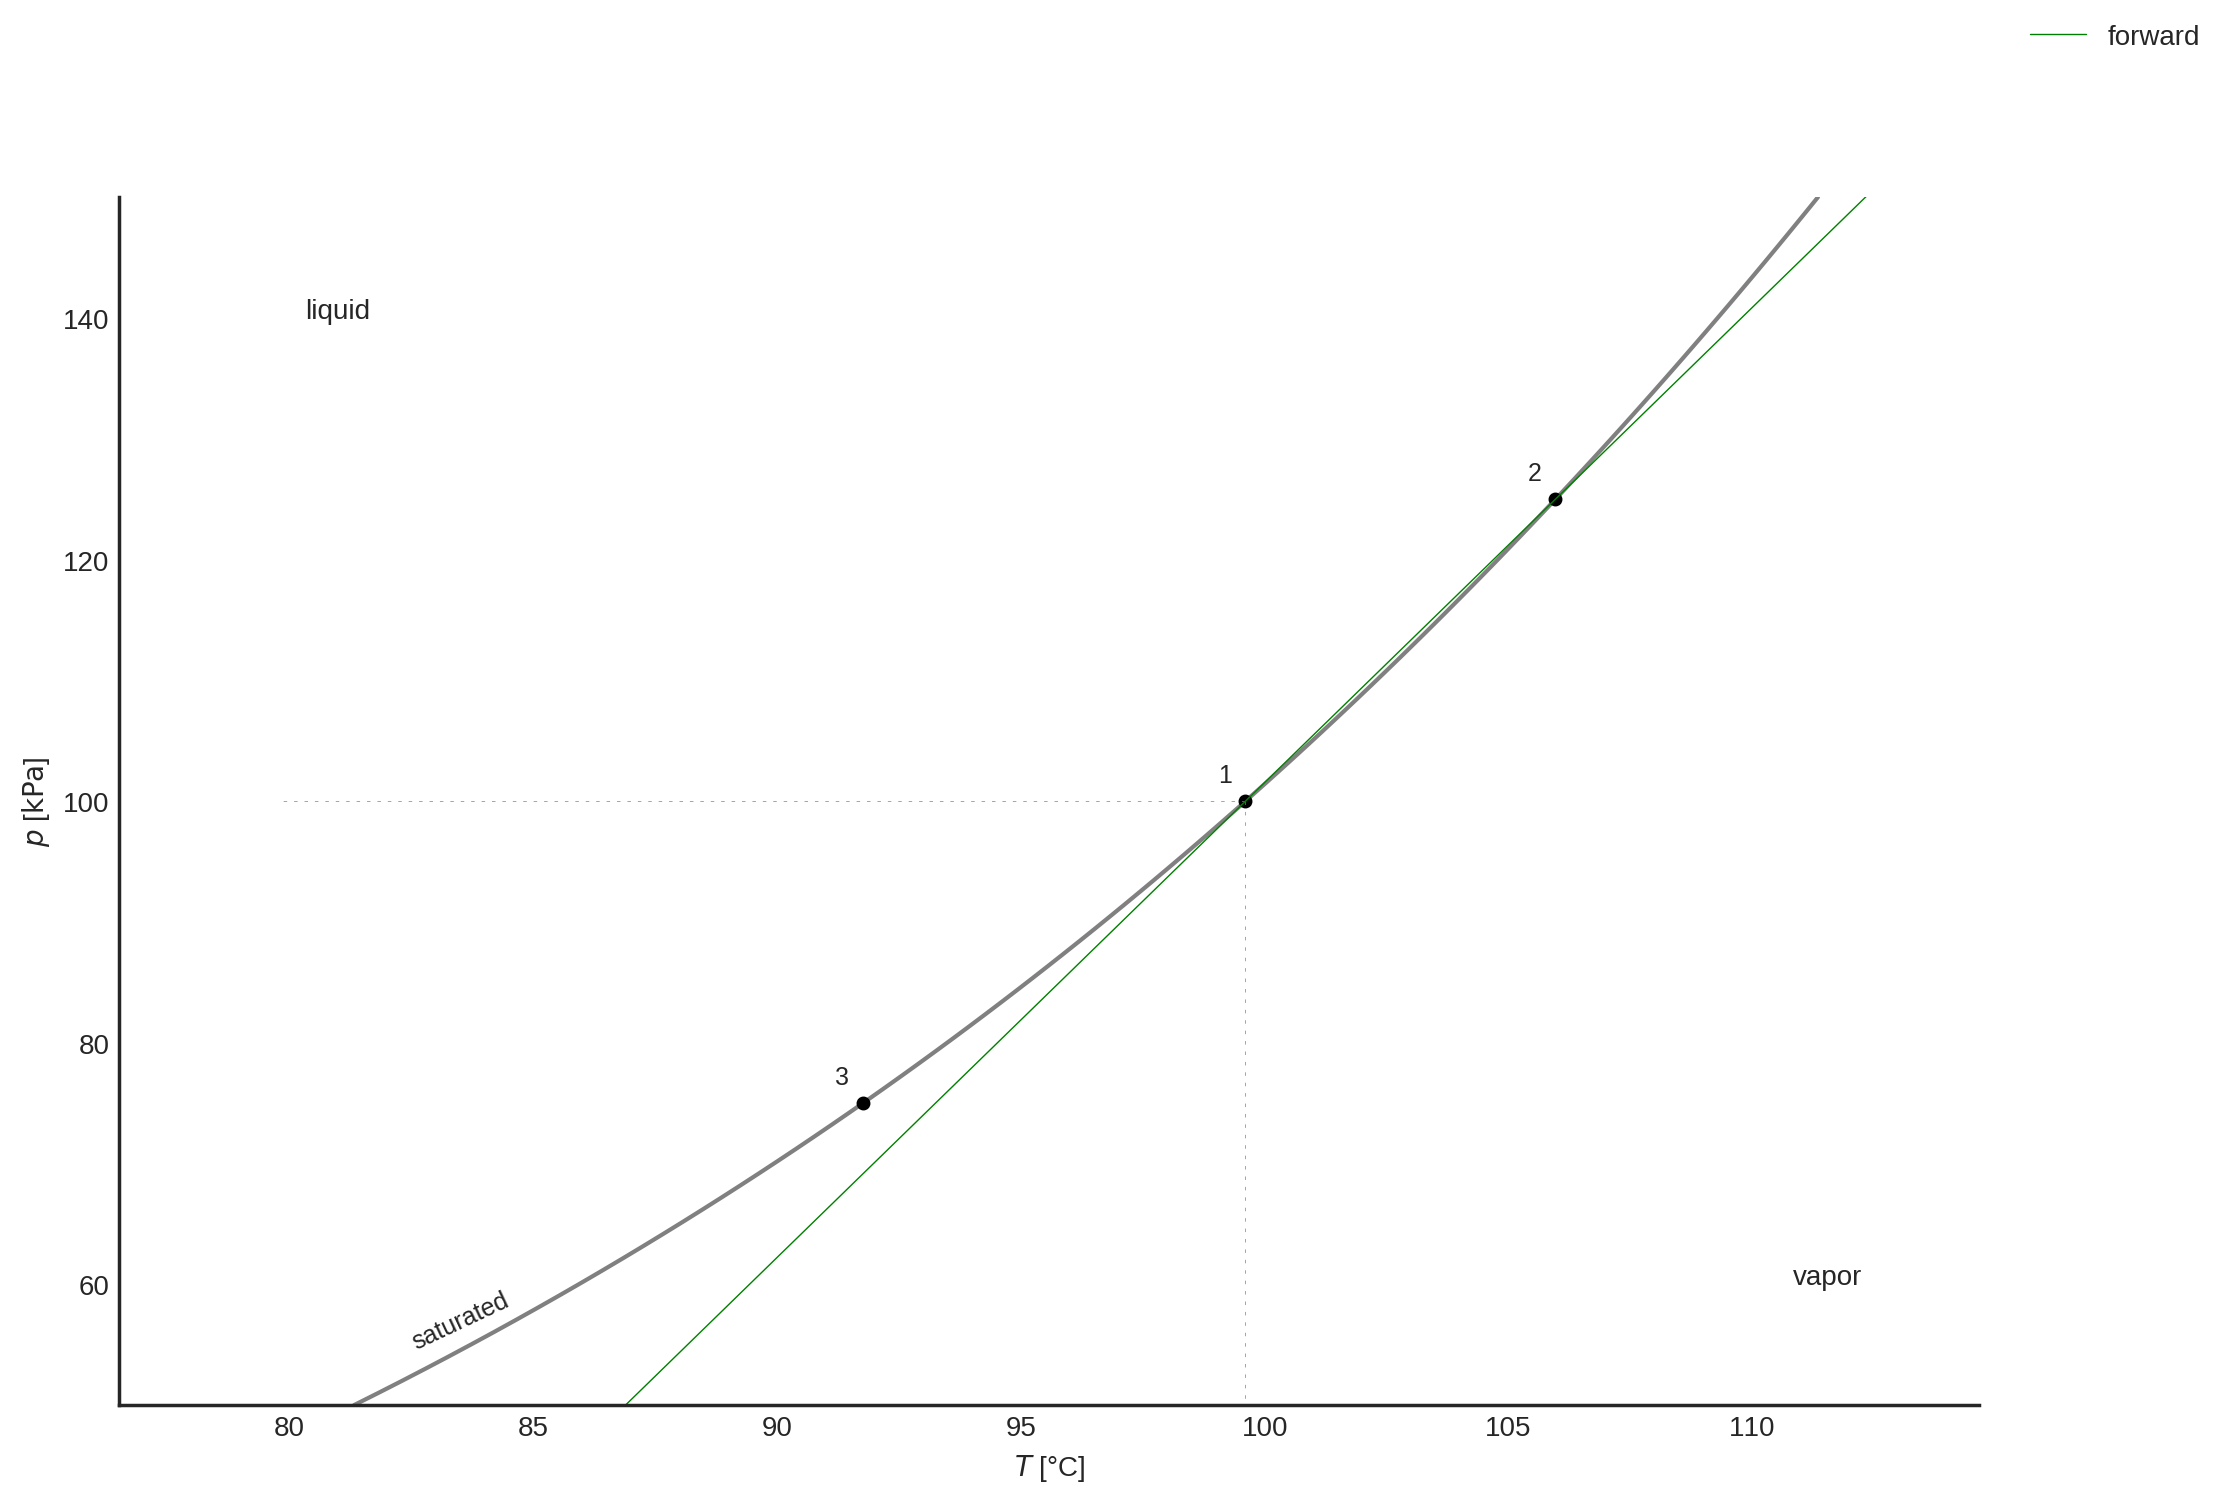

In [10]:
x = Quantity(pT.xlim,'degC')
y = dPdT_forward.to('kPa/delta_degC').magnitude*(x.to('degC').magnitude-T[1].to('degC').magnitude) + p[1].to('kPa').magnitude
pT.plot(x,y,color='green',linewidth=.5,label='forward')
pT.fig.legend()
pT.show()

#### Backward Difference

In [11]:
%%showcalc
dPdT_backward = (p[1]-p[3])/(T[1]-T[3])
h_fg_backward = (T[1].to('K')*v_fg*dPdT_backward).to('kJ/kg')

\begin{align}
  \left.\frac{\partial P}{\partial T}\right|_{backward} &=  \frac{  {p}_{ 1 } - {p}_{ 3 }  }{  {T}_{ 1 } - {T}_{ 3 }  } \\
    &= \frac{  100\ \mathrm{kPa} - 75\ \mathrm{kPa}  }{  372.76\ \mathrm{K} - 364.91\ \mathrm{K}  }\\
    &= 3.1856\ \frac{\mathrm{kPa}}{\mathrm{K}}
\end{align}

\begin{align}
  h_{fg,backward} &=    {T}_{ 1 }  \cdot  v_{fg}   \cdot  \left.\frac{\partial P}{\partial T}\right|_{backward}  \\
    &=   372.76\ \mathrm{K}  \cdot  1.6929\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}   \cdot  3.1856\ \frac{\mathrm{kPa}}{\mathrm{K}} \\
    &= 2010.2\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}



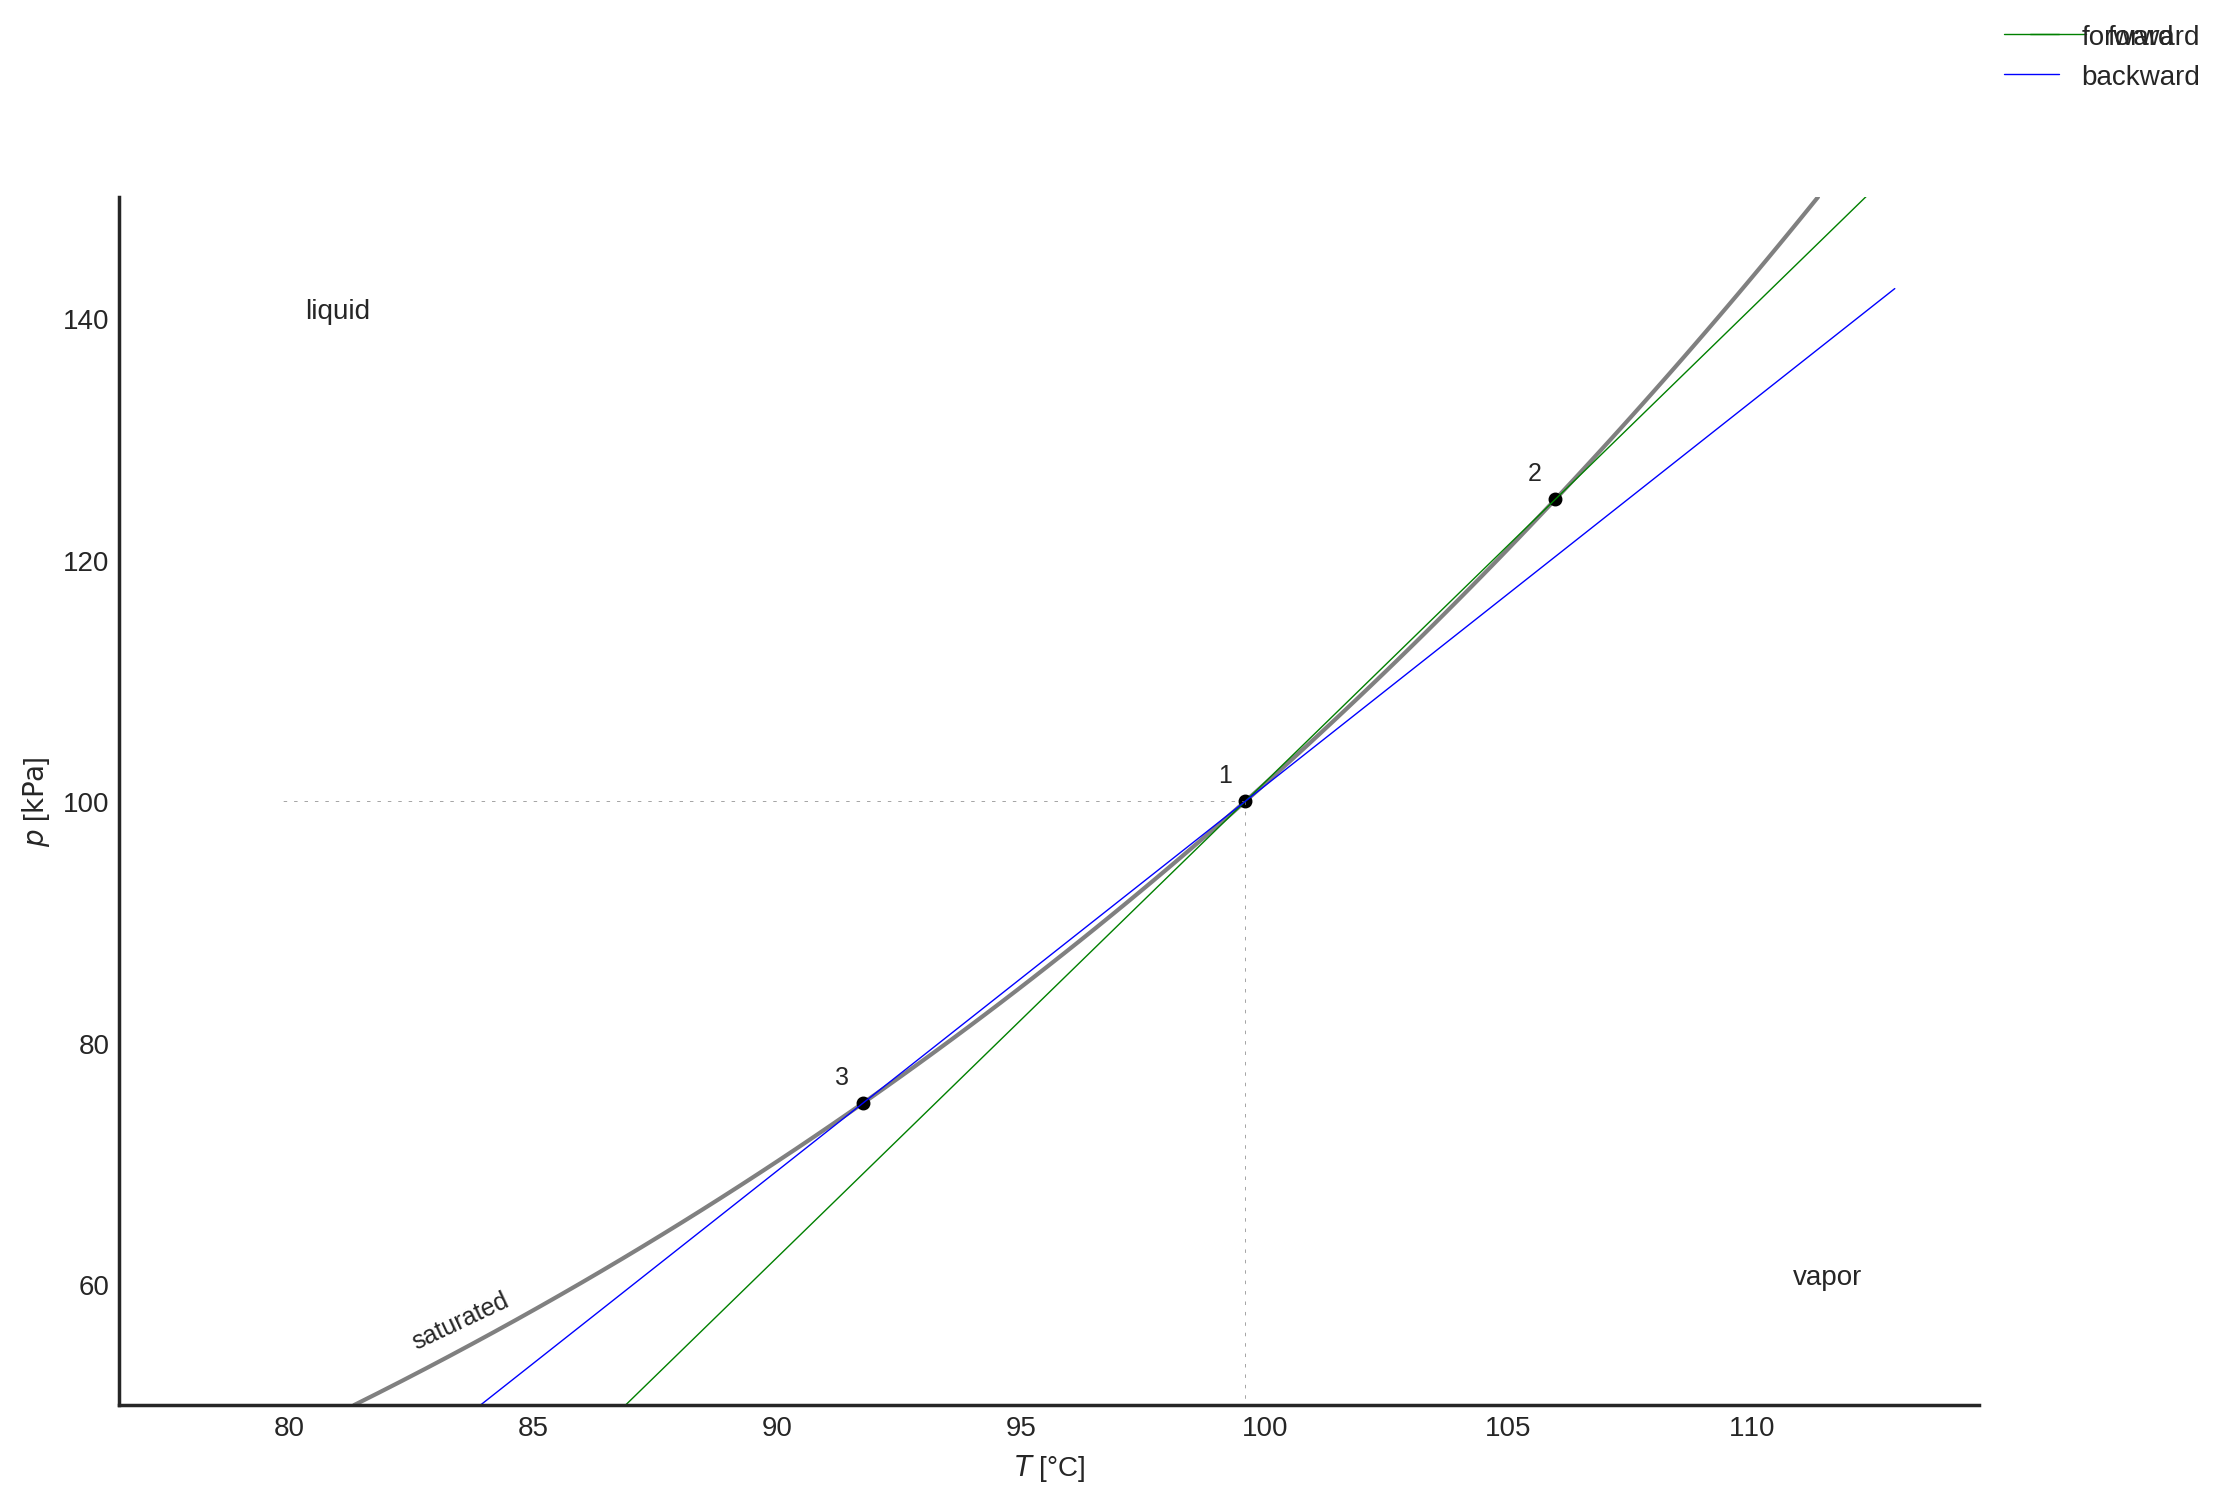

In [12]:
y = dPdT_backward.to('kPa/delta_degC').magnitude*(x.to('degC').magnitude-T[1].to('degC').magnitude) + p[1].to('kPa').magnitude
pT.ax.plot(x,y,color='blue',linewidth=.5,label='backward')
pT.fig.legend()
pT.show()

#### Central Difference

In [13]:
%%showcalc
dPdT_central = (p[2]-p[3])/(T[2]-T[3])
h_fg_central = (T[1].to('K')*v_fg*dPdT_central).to('kJ/kg')

\begin{align}
  \left.\frac{\partial P}{\partial T}\right|_{central} &=  \frac{  {p}_{ 2 } - {p}_{ 3 }  }{  {T}_{ 2 } - {T}_{ 3 }  } \\
    &= \frac{  125\ \mathrm{kPa} - 75\ \mathrm{kPa}  }{  379.12\ \mathrm{K} - 364.91\ \mathrm{K}  }\\
    &= 3.5193\ \frac{\mathrm{kPa}}{\mathrm{K}}
\end{align}

\begin{align}
  h_{fg,central} &=    {T}_{ 1 }  \cdot  v_{fg}   \cdot  \left.\frac{\partial P}{\partial T}\right|_{central}  \\
    &=   372.76\ \mathrm{K}  \cdot  1.6929\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}   \cdot  3.5193\ \frac{\mathrm{kPa}}{\mathrm{K}} \\
    &= 2220.8\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}



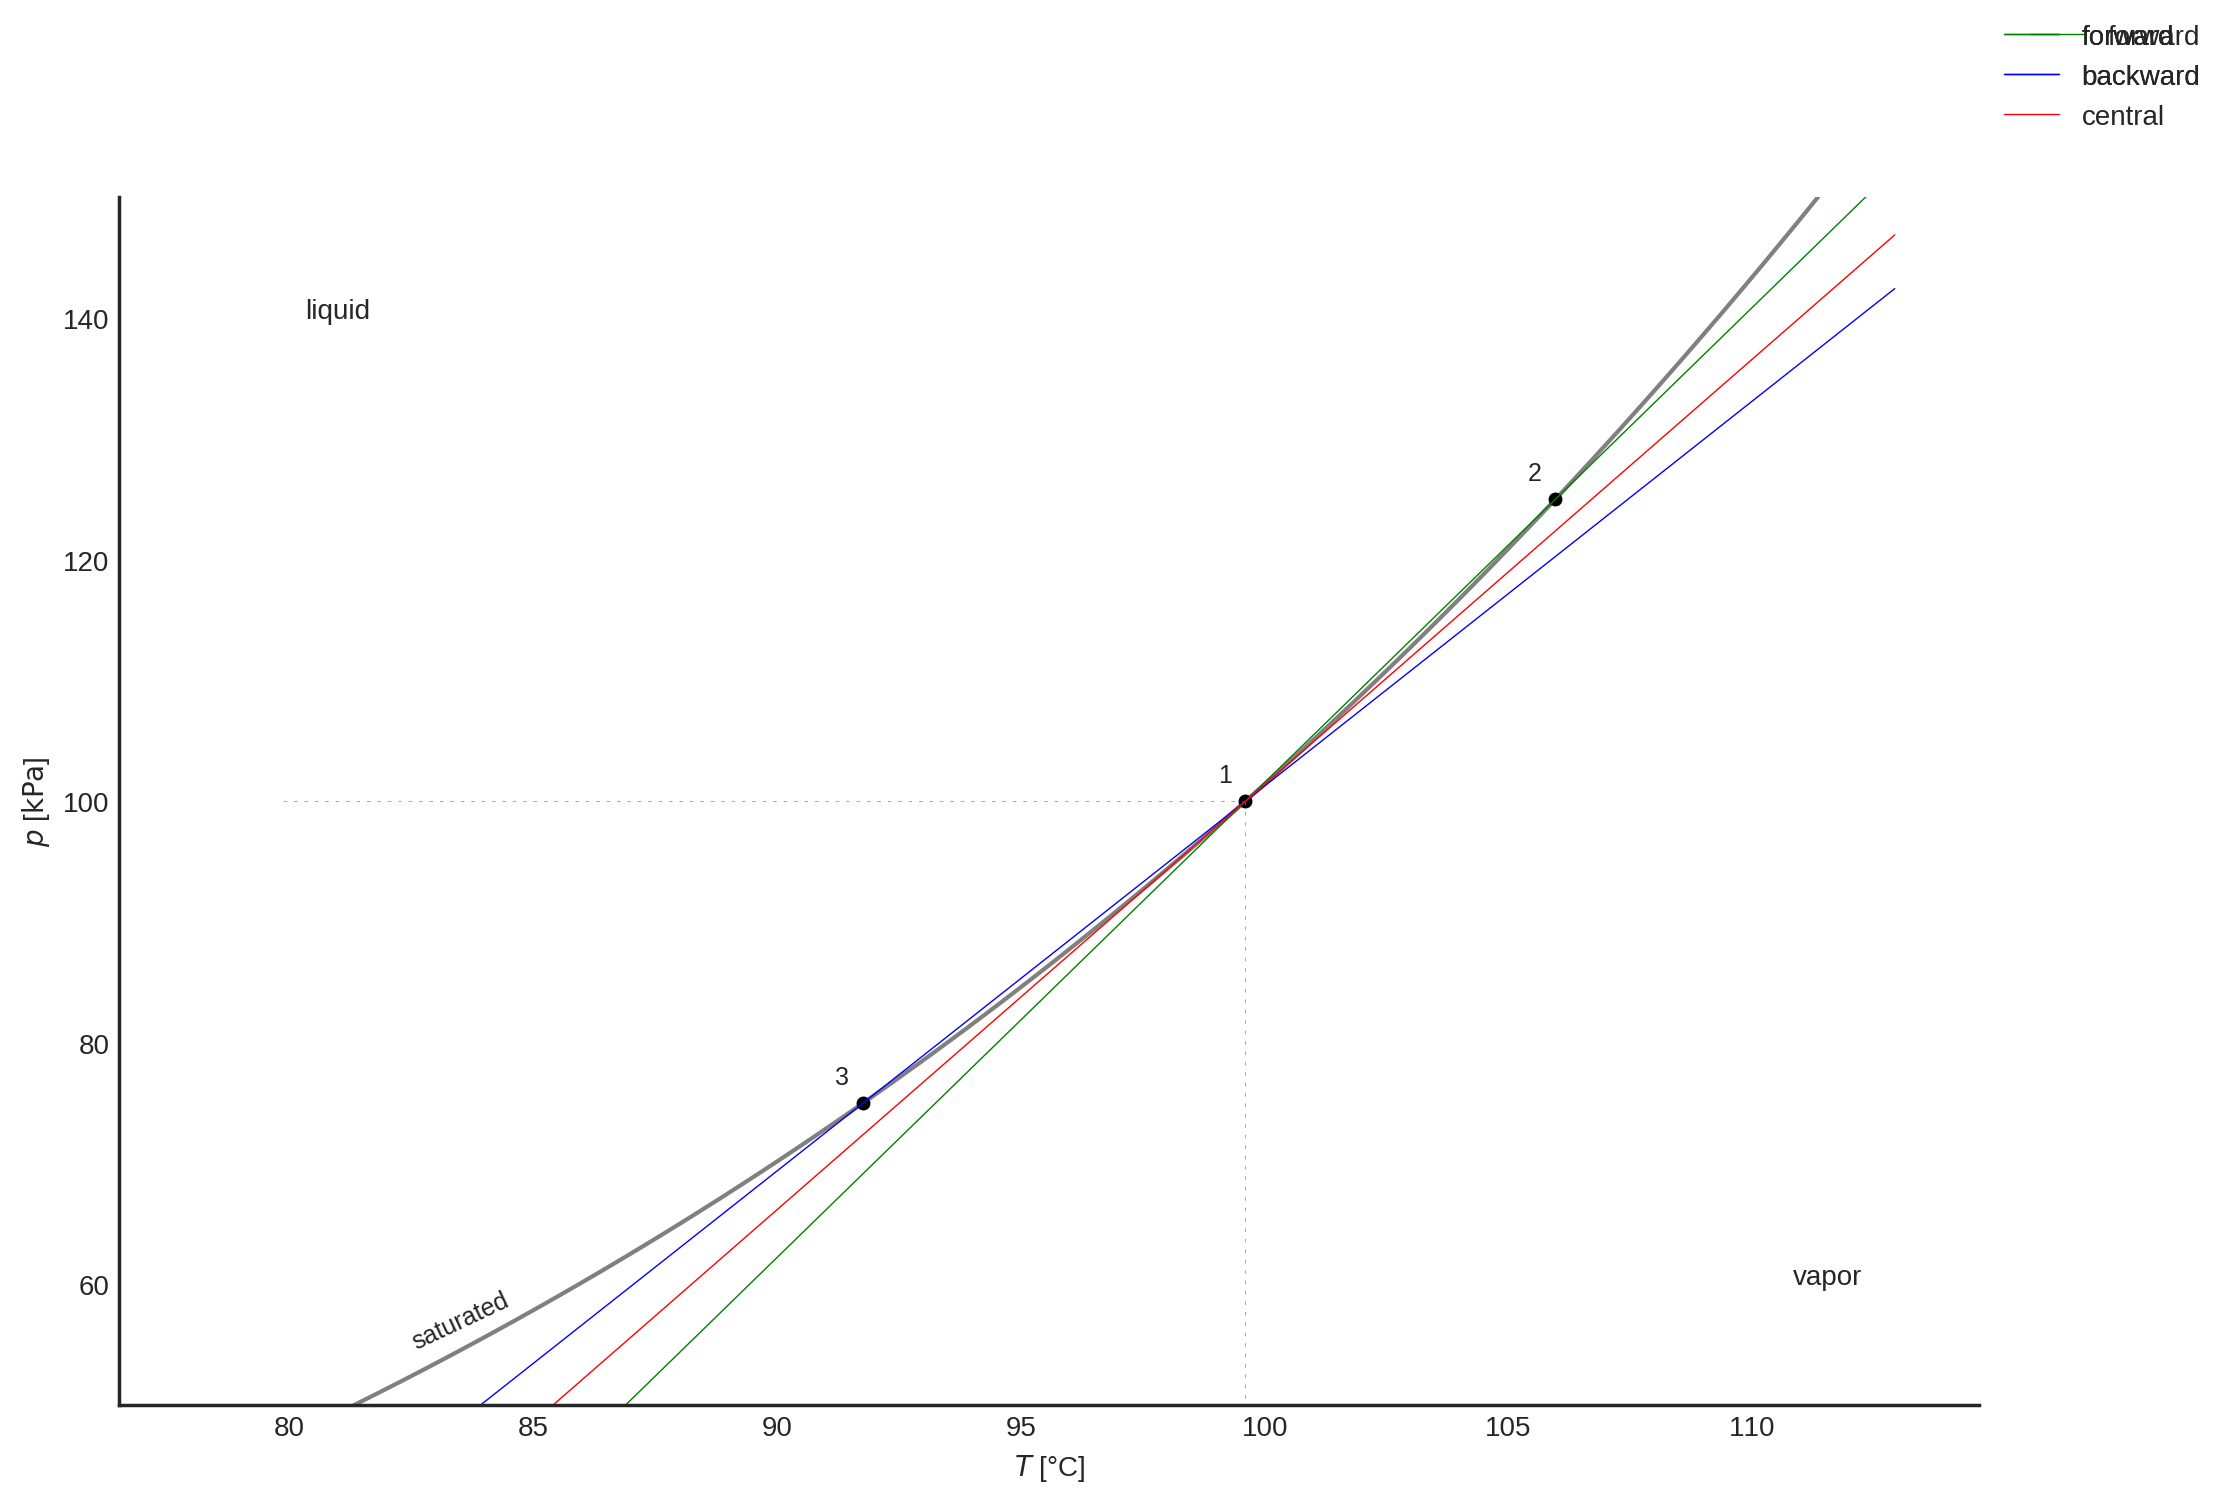

In [14]:
y = dPdT_central.to('kPa/delta_degC').magnitude*(x.to('degC').magnitude-T[1].to('degC').magnitude) + p[1].to('kPa').magnitude
pT.ax.plot(x,y,color='red',linewidth=.5,label='central')
pT.fig.legend()
pT.show()

### (b) Clapeyron-Clausius equation
$$\ln\left(\frac{p_B}{p_A}\right) = \frac{h_{fg}}{R}\left(\frac{1}{T_A}-\frac{1}{T_B}\right)$$

In [15]:
%%showcalc
R = fluid.R
h_fg = ((R*log(p[3]/p[2]))/(1/T[2].to('K')-1/T[3].to('K'))).to('kJ/kg')
h_fg = h_fg.to('kJ/kg') # hide

\begin{align}
  R &=  \underset{ fluid }{ R }  = 0.46152\ \frac{\mathrm{kJ}}{\left(\mathrm{kg} \cdot \mathrm{Δ°C}\right)} 
\end{align}

\begin{align}
  h_{fg} &=  \frac{  R  \cdot  \mathrm{ log }\left( \frac{ {p}_{ 3 } }{ {p}_{ 2 } } \right)  }{  \frac{ 1 }{ {T}_{ 2 } } - \frac{ 1 }{ {T}_{ 3 } }  } \\
    &= \frac{  0.46152\ \frac{\mathrm{kJ}}{\left(\mathrm{kg} \cdot \mathrm{Δ°C}\right)}  \cdot  \mathrm{ log }\left( \frac{ 75\ \mathrm{kPa} }{ 125\ \mathrm{kPa} } \right)  }{  \frac{ 1 }{ 379.12\ \mathrm{K} } - \frac{ 1 }{ 364.91\ \mathrm{K} }  }\\
    &= 2295.6\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  h_{fg} &=  h_{fg}  = 2295.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} 
\end{align}



### (c) Steam Tables

In [16]:
%%showcalc
h_fg = h[4]-h[1]

\begin{align}
  h_{fg} &=   {h}_{ 4 } - {h}_{ 1 }  \\
    &=  2674.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 417.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 2257.4\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}



In [19]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html --no-input --no-prompt "Ex12.1 Clapeyron Equation.ipynb"